## Nos experimentos, as células de carga servem apenas para computar uma estimativa do centro de massa do objeto posto sobre a bancada. Para computado, usamos as posições dos sensores:

passo a passo: <https://brasilescola.uol.com.br/fisica/centro-massa.htm>

In [1]:
import numpy as np
import pandas as pd

In [16]:
Px = [-90, 90, 90, -90]
Py = [120, 120, -120, -120]

In [17]:
# corrigindo dados sem carga

data = pd.read_csv('data/com_carga_de_livro_corrigido.csv')

data

,intern_clock,1,2,3,4,5,6,7,8,centro_de_massa_x,centro_de_massa_y
0,2579974.0,-128.0,0.0,-211.0,0.0,-1.914673e+06,55745.103957,90630.916758,54475.478143,0,0
1,2580978.0,-106.0,1.0,-277.0,0.0,-1.915021e+06,291873.966798,62603.591079,349452.698860,0,0
2,2581982.0,-137.0,-7.0,-257.0,0.0,-1.719262e+06,163613.166506,245046.351721,277396.928420,0,0
3,2582986.0,-149.0,-11.0,-145.0,0.0,-1.646613e+06,406.101895,301040.686023,47262.086591,0,0
4,2583991.0,-161.0,0.0,-271.0,0.0,-1.661692e+06,86611.549261,222450.074356,236391.201913,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72,2652274.0,1.0,-154.0,-222.0,0.0,-1.964184e+06,233014.591103,115484.057328,429395.110730,0,0
73,2653279.0,1.0,-158.0,-262.0,0.0,-1.890260e+06,250800.821956,309466.224880,402632.225842,0,0
74,2654282.0,1.0,-174.0,1.0,-65.0,-2.062462e+06,351008.297184,77976.900905,267417.201208,0,0
75,2655287.0,-128.0,-182.0,0.0,-43.0,-2.012743e+06,488461.802261,213208.998627,247603.216848,0,0


In [25]:
centro_de_massa_x = [0]*data.shape[0]
centro_de_massa_y = [0]*data.shape[0]

for i in range(data.shape[0]):
    centro_de_massa_x[i] = data["5"][i]*Px[0] + data["6"][i]*Px[1] + data["7"][i]*Px[2] + data["8"][i]*Px[3]
    centro_de_massa_x[i] = centro_de_massa_x[i]/(data["5"][i] + data["6"][i] + data["7"][i] + data["8"][i])
    centro_de_massa_y[i] = data["5"][i]*Py[0] + data["6"][i]*Py[1] + data["7"][i]*Py[2] + data["8"][i]*Py[3]
    centro_de_massa_y[i] = centro_de_massa_y[i]/(data["5"][i] + data["6"][i] + data["7"][i] + data["8"][i])

data["centro_de_massa_x"] = centro_de_massa_x
data["centro_de_massa_y"] = centro_de_massa_y

In [29]:
# teste de sanidade

centro_de_massa_x = [0]*data.shape[0]
centro_de_massa_y = [0]*data.shape[0]

for i in range(data.shape[0]):
    centro_de_massa_x[i] = data["6"][i]*Px[0] + data["6"][i]*Px[1] + data["7"][i]*Px[2] + data["8"][i]*Px[3]
    centro_de_massa_x[i] = centro_de_massa_x[i]/(data["6"][i] + data["6"][i] + data["7"][i] + data["8"][i])
    centro_de_massa_y[i] = data["6"][i]*Py[0] + data["6"][i]*Py[1] + data["7"][i]*Py[2] + data["8"][i]*Py[3]
    centro_de_massa_y[i] = centro_de_massa_y[i]/(data["6"][i] + data["6"][i] + data["7"][i] + data["8"][i])

data["centro_de_massa_x"] = centro_de_massa_x
data["centro_de_massa_y"] = centro_de_massa_y

In [30]:
data

,intern_clock,1,2,3,4,5,6,7,8,centro_de_massa_x,centro_de_massa_y
0,2579974.0,-128.0,0.0,-211.0,0.0,-1.914673e+06,55745.103957,90630.916758,54475.478143,12.681343,-15.720950
1,2580978.0,-106.0,1.0,-277.0,0.0,-1.915021e+06,291873.966798,62603.591079,349452.698860,-25.925196,20.689807
2,2581982.0,-137.0,-7.0,-257.0,0.0,-1.719262e+06,163613.166506,245046.351721,277396.928420,-3.426687,-27.570756
3,2582986.0,-149.0,-11.0,-145.0,0.0,-1.646613e+06,406.101895,301040.686023,47262.086591,65.422785,-119.441648
4,2583991.0,-161.0,0.0,-271.0,0.0,-1.661692e+06,86611.549261,222450.074356,236391.201913,-1.985085,-54.225776
...,...,...,...,...,...,...,...,...,...,...,...
72,2652274.0,1.0,-154.0,-222.0,0.0,-1.964184e+06,233014.591103,115484.057328,429395.110730,-27.947138,-9.359897
73,2653279.0,1.0,-158.0,-262.0,0.0,-1.890260e+06,250800.821956,309466.224880,402632.225842,-6.908577,-20.812075
74,2654282.0,1.0,-174.0,1.0,-65.0,-2.062462e+06,351008.297184,77976.900905,267417.201208,-16.277881,40.857611
75,2655287.0,-128.0,-182.0,0.0,-43.0,-2.012743e+06,488461.802261,213208.998627,247603.216848,-2.153024,43.077014


ta dando tudo errado, mas deve ser culpa do sensor ruim.

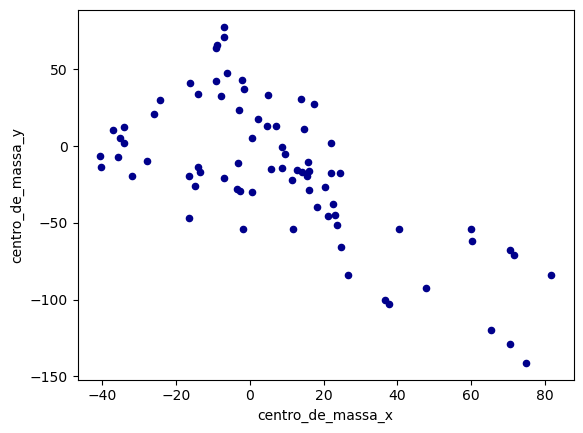

In [32]:
ax1 = data.plot.scatter(x='centro_de_massa_x',
                      y='centro_de_massa_y',
                      c='DarkBlue')

Alguns pontos caem da bancada, isso não é nada bom.